# GRIP - Data Science and Business Analytics Internship

## TASK 2

## Prediction using Unsupervised ML
### Predict the optimum number of clusters and represent it visually.


### AUTHOR: Krithika S

### Importing the necessary libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data

In [22]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preparing data for training

In [30]:

X = df_iris.iloc[:,1:-1].values

y = df_iris.iloc[:,-1].values


### ELBOW METHOD  for finding optimal numbers of clusters 'k'

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


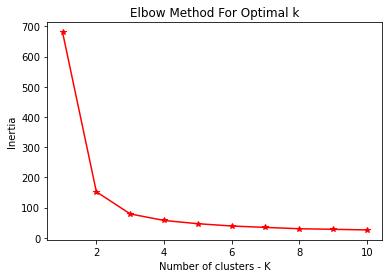

In [24]:
from sklearn.cluster import KMeans

sum_sq_dist = [] # sum of squared distances within cluster

K = range(1,11)

for ci in K:
    k_means = KMeans(n_clusters = ci, init = 'k-means++')
    k_means.fit(X)
    
    #Sum of squared distances to their closest cluster center/Inertia
    sum_sq_dist.append(k_means.inertia_)
    
plt.plot(K, sum_sq_dist,'r*-')
plt.xlabel('Number of clusters - K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

#### From the above plot we can infer that the optimal number of cluster k occurs the elbow point after which there is no steep decrease in inertia. Therefore optimal number of k is 3

### Clustering the data into 3 clusters

In [25]:
k_means_pred = KMeans(n_clusters = 3, init= 'k-means++',)
y_c_pred = k_means_pred.fit_predict(X)

cluster_centers = k_means_pred.cluster_centers_
print("Cluster centers:\n", cluster_centers)

df_pred = pd.DataFrame(np.column_stack((X,y,y_c_pred)), \
                       index=df_iris["Id"],\
                       columns=list(df_iris.columns[1:-1])+["Labels","Predicted Clusters"])

df_pred


Cluster centers:
 [[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Labels,Predicted Clusters
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,1
148,6.5,3.0,5.2,2.0,Iris-virginica,2


### Analysis of clustered data

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

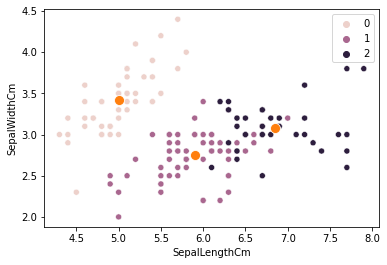

In [43]:
sns.scatterplot(data=df_pred,x="SepalLengthCm",y="SepalWidthCm",hue="Predicted Clusters")
sns.scatterplot(data = cluster_centers, x=cluster_centers[:,0], y=cluster_centers[:,1],s=100)


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

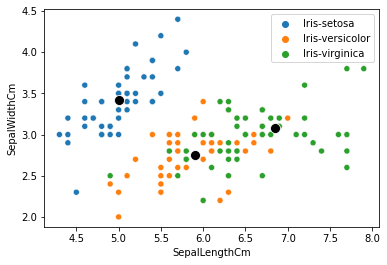

In [41]:
sns.scatterplot(data=df_pred,x="SepalLengthCm",y="SepalWidthCm",hue="Labels")
sns.scatterplot(data = cluster_centers, x=cluster_centers[:,0], y=cluster_centers[:,1],color="black",s=100)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

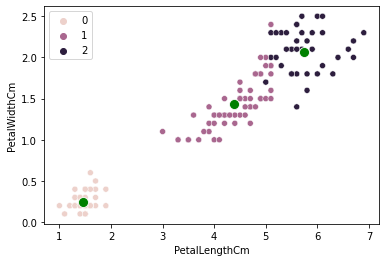

In [40]:
sns.scatterplot(data=df_pred,x="PetalLengthCm",y="PetalWidthCm",hue="Predicted Clusters")
sns.scatterplot(data = cluster_centers, x=cluster_centers[:,2], y=cluster_centers[:,3],color="green",s=100)


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

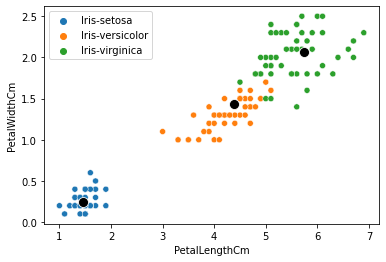

In [39]:
sns.scatterplot(data=df_pred,x="PetalLengthCm",y="PetalWidthCm",hue="Labels")
sns.scatterplot(data = cluster_centers, x=cluster_centers[:,2], y=cluster_centers[:,3],color="black",s=100)
